# COMP 551 Assignment 1 : Getting Started With Machine Learning

### K- Nearest Neighbors Experiments

#### Group 1: Rudi Kischer, Ben Hepditch

# Setup

- make sure to install the requirements.txt file, and to use the correct virtual environment with juptyer notebook

In [2192]:


from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.precision', 3)

# Data

Dataset 1: NHANES age prediction.csv (National Health and Nutrition Health Sur- vey 2013-2014 (NHANES) Age Prediction Subset): https://archive.ics.uci.edu/dataset/887/national+health+and+nutrition+health+survey+2013-2014+(nhanes)+age+prediction+subset

Dataset 2: Breast Cancer Wisconsin (Original) dataset: https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original

### Load Data

In [2193]:


# # DATASET 1: NHANES age prediction.csv
national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset = fetch_ucirepo(id=887) 
dataset_1 = national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset.data

dataset_1.name = 'NHANES_health_survey_age_prediction'
DATA_SET_1_NAME = dataset_1.name

# Drop correlated features
# we are dropping gender, and other unrelated features
unrelated_features = ['RIAGENDR', 'PAQ605', 'DIQ010']
dataset_1.features = dataset_1.features.drop(columns=unrelated_features)

# # DATASET 2: Breast Cancer Wisconsin
breast_cancer_wisconsin_original = fetch_ucirepo(id=15) 
dataset_2 = breast_cancer_wisconsin_original.data

dataset_2.name = 'Breast_Cancer_Wisconsin'
DATA_SET_2_NAME = dataset_2.name

In [2194]:
print( len(dataset_2.features) )
print( len(dataset_2.targets) )

print( len(dataset_1.features))
print( len(dataset_1.targets) )

699
699
2278
2278


### Clean Data

- We want to remove all rows from our data sets which have null values in the targets or in the features.

In [2195]:
# Define Cleaning Function
def clean(dataset):
  X = dataset.features
  Y = dataset.targets
  missing_rows_features = X.isnull().any(axis=1)
  missing_rows_targets = Y.isnull().any(axis=1)
  missing_rows = missing_rows_features | missing_rows_targets
  
  print(f"features_missing: {missing_rows_features.sum()}")
  print(f"targets_missing: {missing_rows_targets.sum()}")

  X_clean = X[-missing_rows]
  Y_clean = Y[-missing_rows]
  print(f'{missing_rows.sum()} rows deleted')
  dataset.features = X_clean
  dataset.targets = Y_clean

  return dataset


In [2196]:
# Clean the DataSets
dataset_1 = clean(dataset_1)
dataset_2 = clean(dataset_2)

features_missing: 0
targets_missing: 0
0 rows deleted
features_missing: 16
targets_missing: 0
16 rows deleted


### Target Statistics

- We want to get some statistics about our target values. We want to know the mean and the squared difference.

In [2197]:
# Define mean
def grouped_target_means(dataset):
    # grouped by the target
    X = dataset.features
    Y = dataset.targets

    XY = pd.concat([X,Y], axis=1)
    XY_grouped = XY.groupby(Y.columns[0])
    XY_mean = XY_grouped.mean()
    return XY_mean

# Define Feature Distance
def grouped_feature_distance(dataset):
    XY_mean = grouped_target_means(dataset)

    sqr_diff = (XY_mean.iloc[0] - XY_mean.iloc[1]) ** 2
    df_sqr_diff = pd.DataFrame([sqr_diff], index=['squarred_diff'])
    return df_sqr_diff

# Print Col Ranking
def feature_ranking(dataset):
    df_sqr_diff = grouped_feature_distance(dataset)
    row = df_sqr_diff.iloc[0]
    sorted_row = row.sort_values(ascending=False)

    ranking_df = pd.DataFrame({
      'Feature': sorted_row.index,
      'Value': sorted_row.values,
      'Rank': range(1, len(sorted_row) + 1)
    })

    return ranking_df


##### Feature Means

In [2198]:
# Get grouped means
print(f'Dataset 1 Feature Means:')
XY_1_bar = grouped_target_means(dataset_1)
print(XY_1_bar)

print(f'Dataset 2 Feature Means: ')
XY_2_bar = grouped_target_means(dataset_2)
print(XY_2_bar)


Dataset 1 Feature Means:
           BMXBMI   LBXGLU   LBXGLT   LBXIN
age_group                                  
Adult      27.968   98.645  109.991  12.107
Senior     27.886  104.330  141.209  10.405
Dataset 2 Feature Means: 
       Clump_thickness  Uniformity_of_cell_size  Uniformity_of_cell_shape  Marginal_adhesion  Single_epithelial_cell_size  Bare_nuclei  Bland_chromatin  Normal_nucleoli  Mitoses
Class                                                                                                                                                                            
2                2.964                    1.306                     1.414              1.347                        2.108        1.347            2.083            1.261    1.065
4                7.188                    6.577                     6.561              5.586                        5.326        7.628            5.975            5.858    2.603


##### Group Feature Distance

In [2199]:
print('Dataset 1:')
XY_1_fd = grouped_feature_distance(dataset_1)
print(XY_1_fd)

print('Dataset 2:')
XY_2_fd = grouped_feature_distance(dataset_2)
print(XY_2_fd)

Dataset 1:
               BMXBMI  LBXGLU   LBXGLT  LBXIN
squarred_diff   0.007  32.319  974.576  2.895
Dataset 2:
               Clump_thickness  Uniformity_of_cell_size  Uniformity_of_cell_shape  Marginal_adhesion  Single_epithelial_cell_size  Bare_nuclei  Bland_chromatin  Normal_nucleoli  Mitoses
squarred_diff           17.845                   27.784                    26.484             17.969                       10.357       39.448           15.144           21.128    2.363


##### Features Ranked By Squared Difference

In [2200]:

print("Dataset 1 Feature Ranking")
d1_feature_ranking = feature_ranking(dataset_1)
print(d1_feature_ranking)

print("Dataset 2 Feature Ranking")
d2_feature_ranking = feature_ranking(dataset_2)
print(d2_feature_ranking)


Dataset 1 Feature Ranking
  Feature    Value  Rank
0  LBXGLT  974.576     1
1  LBXGLU   32.319     2
2   LBXIN    2.895     3
3  BMXBMI    0.007     4
Dataset 2 Feature Ranking
                       Feature   Value  Rank
0                  Bare_nuclei  39.448     1
1      Uniformity_of_cell_size  27.784     2
2     Uniformity_of_cell_shape  26.484     3
3              Normal_nucleoli  21.128     4
4            Marginal_adhesion  17.969     5
5              Clump_thickness  17.845     6
6              Bland_chromatin  15.144     7
7  Single_epithelial_cell_size  10.357     8
8                      Mitoses   2.363     9


-  TODO: *Description goes here analyzing if the features that are strongly different are associated with the target*

- Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.

# Models

### K-Nearest Neighbors

- k nearest neighbour uses a data set to predict the classification of a new data point. The algorithm works by finding the k nearest neighbours to the new data point and classifying the new data point as the most common classification of the k nearest neighbours. The algorithm can be used for both classification and regression problems. For classification problems, the algorithm uses the most common classification of the k nearest neighbours. For regression problems, the algorithm uses the average of the k nearest neighbours.

##### Distance function

In [2201]:
 


def euclidean(x1, x2):
  return np.linalg.norm(x1 - x2)

def manhattan(x1,x2):
  # x1 and x2 are np arrays
  return np.abs(x1 - x2).sum()

def chebyshev(x1, x2):
  return np.abs(x1 - x2).max()

def hamming(x1, x2):
  return (x1 != x2).sum()

def cosineSim(x1, x2):
  prod = x1.dot(x2)
  mag = np.linalg.norm(x1) * np.linalg.norm(x2)
  return prod / mag

### KNN Model

In [2202]:

# K nearest Neighbour
# Mostly following the design from :
# https://github.com/yueliyl/comp551-notebooks/blob/master/KNN.ipynb

class KNN():

  def __init__(self, k=1, similarity_fn=None):
    if not similarity_fn:
      similarity_fn = euclidean
    self.similarity_fn = similarity_fn
    self.k = k
  
  def standardize_features(self):
    x_d_bar = self.X.mean()
    x_d_sd = self.X.std(ddof=0)
    self.X = (self.X - x_d_bar) / x_d_sd

  def fit(self, X, Y, k):
    self.X = X
    self.Y = Y
    self.k = k

    self.Y_np = Y.to_numpy()
    self.X_np = X.to_numpy()
    # self.C = self.Y[:, 0].nunique()
    # self.standardize_features()


  def predict_sample(self, x_i):
    similiartity_scores = np.apply_along_axis(self.similarity_fn, axis=1, arr=self.X_np, x2=x_i)
    top_k_idx = np.argpartition(similiartity_scores, self.k)[:self.k]
    top_k_neighbour_labels = self.Y_np[top_k_idx]
    labels = np.unique(self.Y_np[:, 0])
    # get a count for each label in the top k neighbour
    # we want to have a mapping from each label to the number of times it appears in the top k
    label_counts = np.array([np.count_nonzero(top_k_neighbour_labels == label) for label in labels])
    label_probs = label_counts / self.k
    # convert the probs into a data frame with one column for each label
    # the rows are the probabilities for each label
    # the index should be the same index as the input
    return label_probs
    # similiarity_scores = self.X.apply(lambda x_j: self.similiarity_fn(x_i,x_j), axis=1)
    # top_k_idx = similiarity_scores.nsmallest(self.k).index 
    # top_k_neighbour_labels =  self.Y.loc[top_k_idx][self.Y.columns[0]]
    # labels = self.Y.iloc[:, 0].unique()
    # label_probs = top_k_neighbour_labels.value_counts(normalize=True).reindex(labels, fill_value=0)
    # return pd.Series(label_probs, index=labels)
  
  def predict(self, x):
    # print(x)
    x_np = x.to_numpy()
    labels = np.unique(self.Y_np[:, 0])
    label_probs = np.apply_along_axis(self.predict_sample, axis=1, arr=x_np)
    label_probs = pd.DataFrame(label_probs, columns=labels)
    label_probs.index = x.index
    # we want the index of the col with the highest probability
    # y_index = np.argmax(label_probs, axis=1)
    # # map the index to the label
    # labels = self.Y.iloc[:, 0].unique()
    # y = labels[y_index]
    # # now we want a data frame, with one column for each label
    # # and for each row that has that label, it gets a 1, otherwise 0 in that column
    # # so there should be two columns, one for each label
    # # and the number of rows should be the number of rows in the input
    # y_df = pd.DataFrame(0, index=np.arange(len(y)), columns=labels)
    # for i, label in enumerate(y):
    #   y_df.loc[i, label] = 1
    # # we need to maintain the same index as the input
    # y_df.index = x.index
    return label_probs
    # return y_df, label_probs
    # prob_df = x.apply(self.predict_sample, axis=1)
    # y = prob_df.idxmax(axis=1)
    # predicted_probabilities = prob_df
    # y_df = pd.DataFrame(y, columns=self.Y.columns)
    # return y_df, predicted_probabilities



# Decision Tree

### Cost Functions

In [2203]:
def misclassification_error(y_Rk, C):
  # we want to get the most frequent label, and then the cost is the number
  # of samples that are not the most frequent label
  if len(y_Rk) == 0:
    return 0
  # get the label with the highest frequency
  w_k = y_Rk.iloc[:, 0].value_counts().idxmax()
  cost = (y_Rk != w_k).mean()
  return cost.iloc[0]

def entropy(y_Rk, C):
  # entropy:
  # -SUM_C P(C) log(P(C))
  # we need to get the probability of each class

  def entropy_c(c):
    if len(y_Rk) == 0:
      return 0
    p_c = (y_Rk == c).mean().iloc[0]
    if p_c == 0:
      return 0
    return -p_c * np.log(p_c)
  # sum up entrop of each class, and weight it by the number of samples in that class
  H = 0
  for c in C:
    H += entropy_c(c)
  return H

def gini_index(y_Rk, C):
  # the gini index represents the variance of the class distribution
  if len(y_Rk) == 0:
    return 0
  def gini_c(c):
    p_c = (y_Rk == c).mean().iloc[0]
    return p_c ** 2
  GI = 1 - sum(gini_c(c) for c in C)
  return GI * len(y_Rk)

  

### Decision Node

# Threshold Selection

In [2204]:


def greedy_split(X, Y, C, cost_fn):

  min_cost = np.inf
  best_feature = None
  best_threshold = None
  
  for feature in X.columns:
    for threshold in X[feature].unique():
      left = X[feature] < threshold
      right = ~left
      # weighted cost of the two children
      cost = (1/len(Y)) * ( len(Y[left]) * cost_fn(Y[left], C) + len(Y[right]) * cost_fn(Y[right], C) )
      if cost < min_cost:
        min_cost = cost
        best_feature = feature
        best_threshold = threshold
  return min_cost, best_feature, best_threshold     


In [2205]:
# https://colab.research.google.com/github/yueliyl/comp551-notebooks/blob/master/DecisionTree.ipynb

class DTNode():

  def __init__(self, datum_idexes, parent):
    self.left = None
    self.right = None
    self.feature = None
    self.threshold = None
    if parent:
      self.depth = parent.depth + 1
      self.parent = parent
      self.X = parent.X[datum_idexes]
      self.Y = parent.Y[datum_idexes]
    else:
      self.depth = 0
      self.parent = None
      self.X = None
      self.Y = None

### Decision Tree Model

In [2206]:

class DT():
  
  def __init__(self,
                max_depth=3,
                min_leaf_instance=1,
                discrete_labels=True,
                cost_fn=misclassification_error):
    self.max_depth = max_depth
    self.root = None
    self.cost_fn = cost_fn
    self.min_leaf_instance = min_leaf_instance
    self.discrete_labels = discrete_labels


  def _fit_tree(self, node):
      if node.depth >= self.max_depth:
        return
      if len(node.Y) < self.min_leaf_instance:
        return
      
      min_cost, best_feature, best_threshold = greedy_split(node.X, node.Y,self.C,cost_fn=self.cost_fn)
      if min_cost == np.inf:
        return
      
      node.split_feature = best_feature
      node.split_threshold = best_threshold

      # print(node.depth, best_feature, best_threshold, min_cost)

      # now we need all the indexs that are less than the threshold
      left_idx = node.X[node.split_feature] < node.split_threshold
      right_idx = ~left_idx

      node.left = DTNode(left_idx, node)
      node.right = DTNode(right_idx, node)

      self._fit_tree(node.left)
      self._fit_tree(node.right)

  def fit(self, X, Y):
    self.X = X
    self.Y = Y
    if self.discrete_labels:
      self.C = np.unique(Y)
    self.root = DTNode(X.index, None)
    self.root.X = X
    self.root.Y = Y
    self.root.C = self.C
    self._fit_tree(self.root)
    return self

  def get_leaf(self, x_i, node):
    if node.left is None and node.right is None:
      return node
    
    # get index of the feature we are splitting on
    # feature_idx = self.X.columns.get_loc(node.split_feature)
    if x_i[node.split_feature] < node.split_threshold:
      return self.get_leaf(x_i, node.left)
    else:
      return self.get_leaf(x_i, node.right)

  def _predict_sample(self, x_i):
      leaf = self.get_leaf(x_i, self.root)
      # we want to return the probability of each label in the leaf
      labels = self.C
      # get the probs of each label in the leaf, make sure to handle cases where there are zero of a label
      label_probs = np.array([np.count_nonzero(leaf.Y == label) / len(leaf.Y) for label in labels])
      return label_probs

  def predict(self, x):
    # we want to navigate to the leaf for each sample
    # then we want to make a column for each label
    # the column should store the perctage of samples with that label in the leaf
    # we should return a data frame with the same index as the input
    labels = self.C
    label_probs = x.apply(self._predict_sample, axis=1)
    label_probs = pd.DataFrame(label_probs.tolist(), columns=labels, index=x.index)
    return label_probs

# Experiments

## Splitting Data
- We will start by first splitting the data into training and testing sets.

In [2207]:

def train_test_split(dataset, split, shuffle=True, seed=1):
    X = dataset.features
    Y = dataset.targets
    XY = pd.concat([X, Y], axis=1)
    XY_shuffled = XY.sample(frac=1, random_state=seed) #.reset_index(drop=True)
    split_idx = int(len(XY) * split)
    
    y_size = -Y.shape[1]

    # Train Data Set
    train_set = XY_shuffled[split_idx:]
    X_train = train_set.iloc[:, :y_size]
    Y_train = train_set.iloc[:, y_size:]

    # Test Data Set
    test_set = XY_shuffled[:split_idx]
    X_test = test_set.iloc[:, :y_size]
    Y_test = test_set.iloc[:, y_size:]

    # we need to maintain the the original index

    return X_train, Y_train, X_test, Y_test

## Experiments
- We will evaluate various metrics over our two different models , and our two different data sets.

In [2208]:

# Evaluation functions
def get_knn_probs(X_t, Y_t, X_e, k):
  knn = KNN()
  knn.fit(X_t, Y_t, k)
  return knn.predict(X_e)

#### Receiver Operating Characteristic (ROC) functions

In [2209]:
from sklearn import metrics
import matplotlib.pyplot as plt

def get_auc_score(Y, label_probs, label):
  # get the label the most common label in the test set
  fpr, tpr, _ = metrics.roc_curve(Y, label_probs[label], pos_label=label)
  roc_auc = metrics.auc(fpr, tpr)
  return fpr, tpr, roc_auc


def plot_roc_curve(fpr, tpr, roc_auc, title, label):
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel(f'False Positive Rate {label}')
  plt.ylabel(f'True Positive Rate {label}')
  plt.title(title)
  plt.legend(loc="lower right")
  plt.show()

def plot_t_e_roc_curve(fpr_t, tpr_t, roc_auc_t, fpr_e, tpr_e, roc_auc_e, title):
  plt.figure()
  plt.plot(fpr_t, tpr_t, color='darkorange', lw=2, label='ROC curve Train (area = %0.2f)' % roc_auc_t)
  plt.plot(fpr_e, tpr_e, color='navy', lw=2, label='ROC curve Test (area = %0.2f)' % roc_auc_e)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(title)
  plt.legend(loc="lower right")
  plt.show()

def roc_curve(Y, label_probs):
    label = Y.iloc[:, 0].value_counts().idxmax()
    fpr, tpr, roc_auc = get_auc_score(Y, label_probs, label)
    accuracy = metrics.accuracy_score(Y, label_probs.idxmax(axis=1))
    return fpr, tpr, roc_auc, accuracy

## Experiment 1: AUROC Comparison between KNN and Decision Tree

In [2225]:
def get_dt_probs(dt, X_e, max_depth, min_leaf_instance):
  dt.max_depth = max_depth
  dt.min_leaf_instance = min_leaf_instance
  return dt.predict(X_e)



def plot_multiple_roc_curves(roc_curves, title):
  # roc_cruves is a dict mapping from the curve name to a tuple of (fpr, tpr, roc_auc)
  plt.figure()
  for name, curve in roc_curves.items():
    fpr, tpr, roc_auc = curve
    plt.plot(fpr, tpr, lw=2, label=f'{name} (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(title)
  plt.legend(loc="lower right")
  plt.show()

def plot_accuracy_bar_chart(accuracies, title):
  # plot a double bar chart, with the train and test accuracy for each model
  # label the accuracy bars with the accuracy
  # set an appropriate limit for the y axis
  # get the max and min accuracy
  # get the diff between the max and min and add relative padding
  labels = list(accuracies.keys())
  train_accuracies = [accuracy[0] for accuracy in accuracies.values()]
  test_accuracies = [accuracy[1] for accuracy in accuracies.values()]

  max_acc = max(max(train_accuracies), max(test_accuracies))
  min_acc = min(min(train_accuracies), min(test_accuracies))
  diff = max_acc - min_acc
  padding = diff * 0.1
  x = np.arange(len(labels))
  width = 0.35
  fig, ax = plt.subplots()
  rects1 = ax.bar(x - width/2, train_accuracies, width, label='Train')
  rects2 = ax.bar(x + width/2, test_accuracies, width, label='Test')
  ax.set_ylabel('Accuracy')
  ax.set_title(title)
  ax.set_xticks(x)
  ax.set_xticklabels(labels)
  ax.legend()
  ax.set_ylim([min_acc - padding, max_acc + padding])
  # set the accuracy on top of the bars
  for rect in rects1:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
  for rect in rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
  plt.show()


def experiment1(D, test_split=0.2, k=70, max_depth=10, min_leaf_instance=1):

  # we will be comparing the performance of the KNN and DT on the two datasets
  X_t, Y_t, X_e, Y_e = train_test_split(D, test_split)

  knn_probs_t = get_knn_probs(X_t, Y_t, X_t, k)
  knn_probs_e = get_knn_probs(X_t, Y_t, X_e, k)
  fpr_knn_t, tpr_knn_t, roc_auc_knn_t, accuracy_knn_t = roc_curve(Y_t, knn_probs_t)
  fpr_knn_e, tpr_knn_e, roc_auc_knn_e, accuracy_knn_e = roc_curve(Y_e, knn_probs_e)


  dt = DT(max_depth=max_depth, min_leaf_instance=min_leaf_instance)
  dt.fit(X_t, Y_t)
  dt_test_probs = get_dt_probs(dt, X_e, max_depth, min_leaf_instance)
  dt_train_probs = get_dt_probs(dt, X_t, max_depth, min_leaf_instance)
  fpr_dt_t, tpr_dt_t, roc_auc_dt_t, accuracy_dt_t = roc_curve(Y_t, dt_train_probs)
  fpr_dt_e, tpr_dt_e, roc_auc_dt_e, accuracy_dt_e = roc_curve(Y_e, dt_test_probs)

  curves = {
    'KNN Train': (fpr_knn_t, tpr_knn_t, roc_auc_knn_t),
    'KNN Test': (fpr_knn_e, tpr_knn_e, roc_auc_knn_e),
    'DT Train': (fpr_dt_t, tpr_dt_t, roc_auc_dt_t),
    'DT Test': (fpr_dt_e, tpr_dt_e, roc_auc_dt_e)
  }


  accuracies = {
    'KNN': (accuracy_knn_t, accuracy_knn_e),
    'DT': (accuracy_dt_t, accuracy_dt_e)
  }

  return curves, accuracies


  
d1_curves, d1_accuracies = experiment1(dataset_1)
d2_curves, d2_accuracies = experiment1(dataset_2)



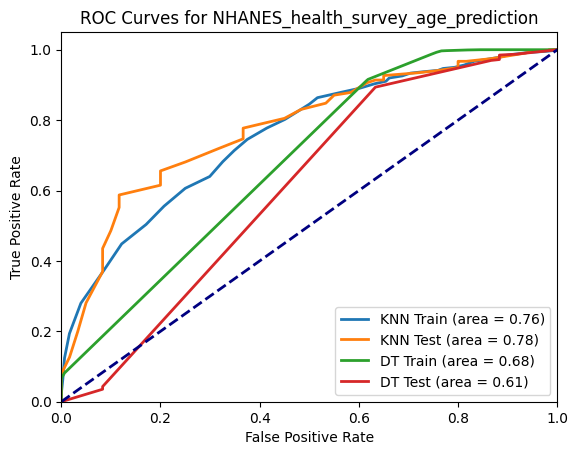

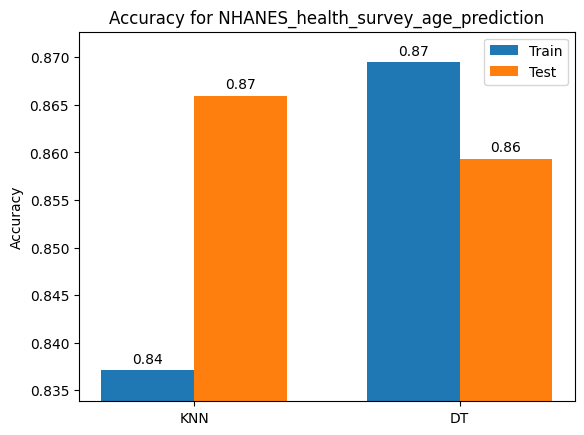

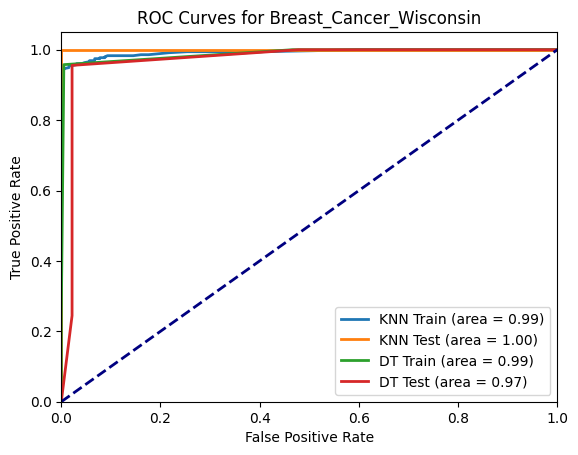

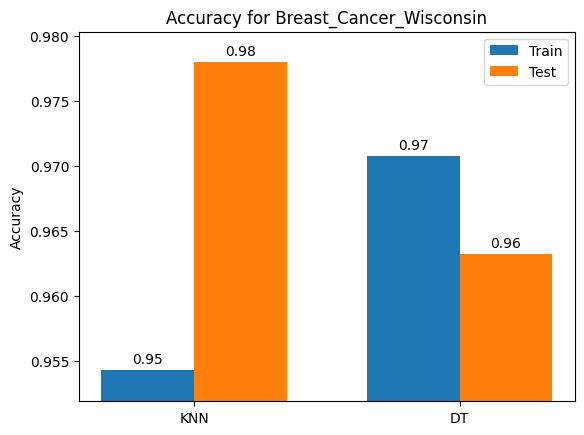

In [2226]:
plot_multiple_roc_curves(d1_curves, f'ROC Curves for {DATA_SET_1_NAME}')
plot_accuracy_bar_chart(d1_accuracies, f'Accuracy for {DATA_SET_1_NAME}')

plot_multiple_roc_curves(d2_curves, f'ROC Curves for {DATA_SET_2_NAME}')
plot_accuracy_bar_chart(d2_accuracies, f'Accuracy for {DATA_SET_2_NAME}')

## Experiment 2: KNN with different k values

In [2211]:
# define test conditions

def experiment2(D, test_split=0.2, k_start=1, k_stop=10, k_step=1):
  X_t, Y_t, X_e, Y_e = train_test_split(D, test_split)

  # get all even multiples of step, that are within the range of k_start and k_stop
  k_values = [k for k in range(k_start, k_stop + 1) if k % k_step == 0]
  # insetrt start and stop if they are not in the list
  if k_start not in k_values:
    k_values.insert(0, k_start)
  if k_stop not in k_values:
    k_values.append(k_stop)



  results = []

  for k in k_values:
    test_label_probs = get_knn_probs(X_t, Y_t, X_e, k)
    train_label_probs = get_knn_probs(X_t, Y_t, X_t, k)
    fpr_t, tpr_t, roc_auc_t, accuracy_t = roc_curve(Y_t, train_label_probs)
    fpr_e, tpr_e, roc_auc_e, accuracy_e = roc_curve(Y_e, test_label_probs)



    print(f'k={k}, AUC_t={roc_auc_t}, AUC_e={roc_auc_e}, Accuracy_t={accuracy_t}, Accuracy_e={accuracy_e}')
    results.append({
      'k': k,
      'AUC_t': roc_auc_t,
      'AUC_e': roc_auc_e,
      'Accuracy_t': accuracy_t,
      'Accuracy_e': accuracy_e,
      'fpr_t': fpr_t,
      'tpr_t': tpr_t,
      'fpr_e': fpr_e,
      'tpr_e': tpr_e
    })
  
  results = pd.DataFrame(results)

  return results

# Run the experiment on the two datasets
results_1 = experiment2(dataset_1, k_stop=100, k_step=10)

results_2 = experiment2(dataset_2)






k=1, AUC_t=1.0, AUC_e=0.5662447257383966, Accuracy_t=1.0, Accuracy_e=0.7868131868131868
k=10, AUC_t=0.8268554450642736, AUC_e=0.7212447257383966, Accuracy_t=0.8475041140976413, Accuracy_e=0.8637362637362638
k=20, AUC_t=0.8020966875714632, AUC_e=0.7196835443037974, Accuracy_t=0.8453099286889743, Accuracy_e=0.8681318681318682
k=30, AUC_t=0.7911444076781815, AUC_e=0.7500000000000001, Accuracy_t=0.8420186505759737, Accuracy_e=0.8615384615384616
k=40, AUC_t=0.7804076002217525, AUC_e=0.7663713080168776, Accuracy_t=0.834339001645639, Accuracy_e=0.8615384615384616
k=50, AUC_t=0.7650159384636708, AUC_e=0.7729113924050635, Accuracy_t=0.8381788261108064, Accuracy_e=0.8681318681318682
k=60, AUC_t=0.7620772842243857, AUC_e=0.779957805907173, Accuracy_t=0.8392759188151399, Accuracy_e=0.8637362637362638
k=70, AUC_t=0.7563028394719518, AUC_e=0.7782489451476793, Accuracy_t=0.8370817334064728, Accuracy_e=0.865934065934066
k=80, AUC_t=0.7539662087245765, AUC_e=0.7735864978902953, Accuracy_t=0.83543609434

In [2212]:
# plot the results for roc of each k value (k- value x axis, AUC y axis)

def plot_results_exp2(results, title):
  plt.plot(results['k'], results['Accuracy_e'], label='Test Accuracy')
  plt.xlabel('k')
  plt.ylabel('Accuracy')
  plt.title(title)
  plt.show()

  # plot the AUC for each k value
  plt.plot(results['k'], results['AUC_e'], label='Test AUC')
  plt.xlabel('k')
  plt.ylabel('AUC')
  plt.title(title)
  plt.show()
  


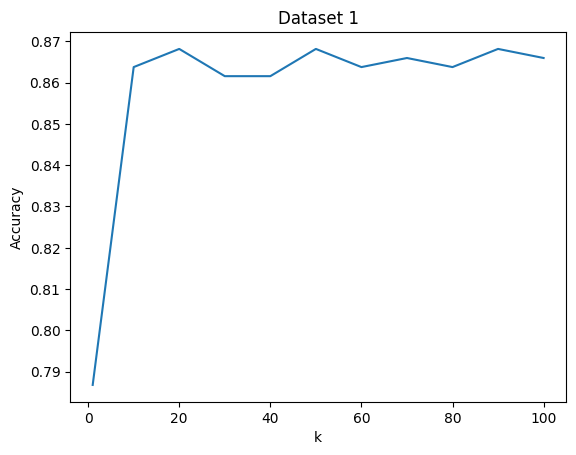

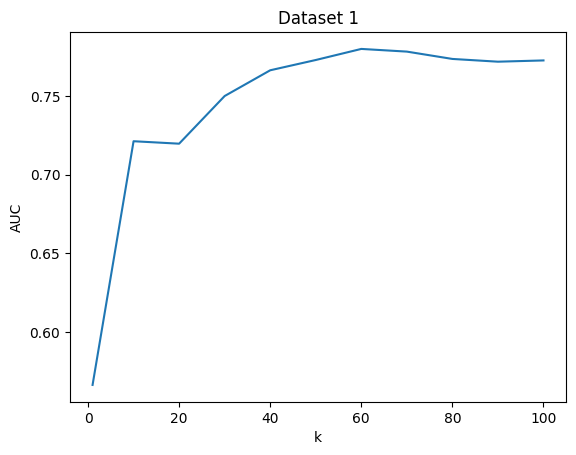

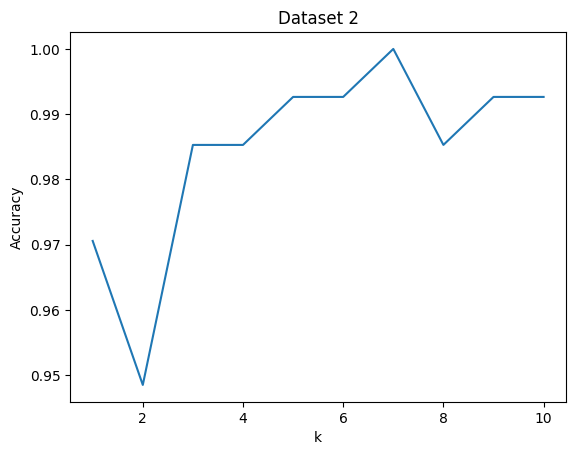

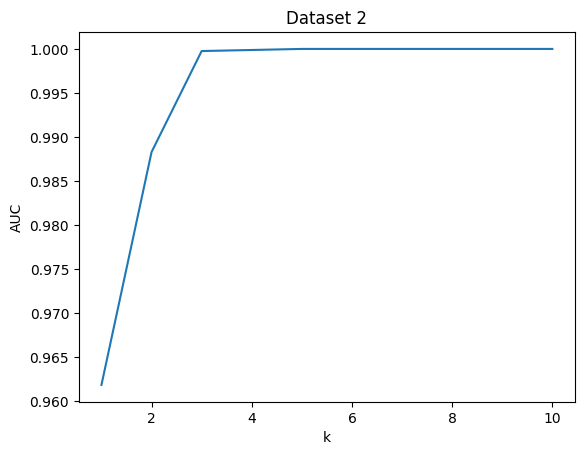

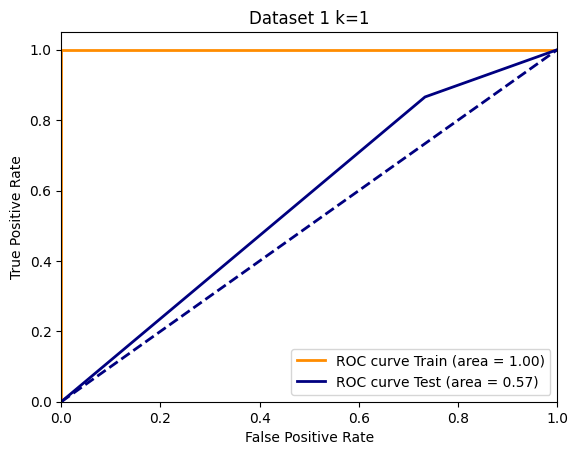

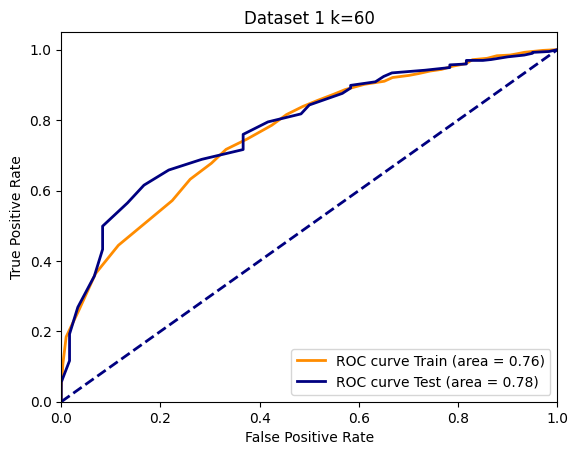

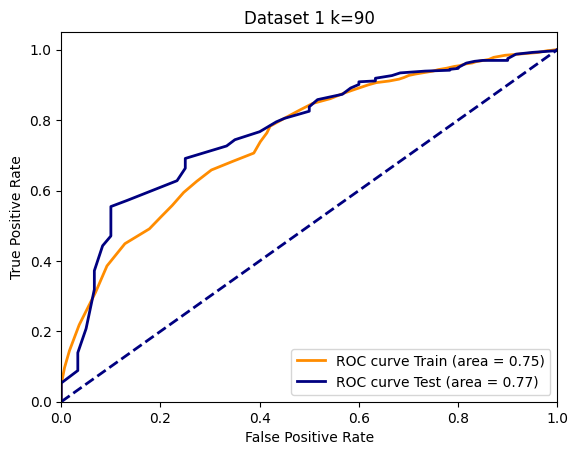

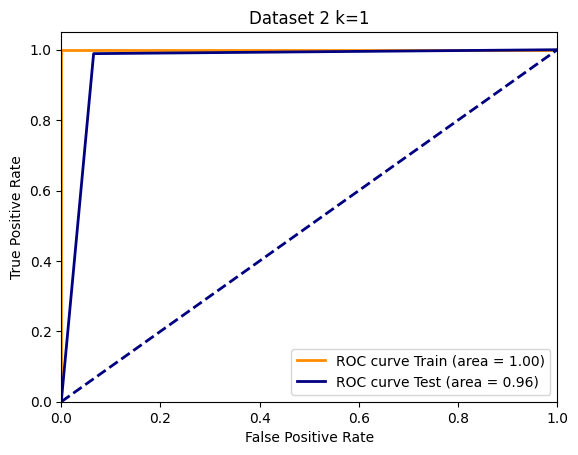

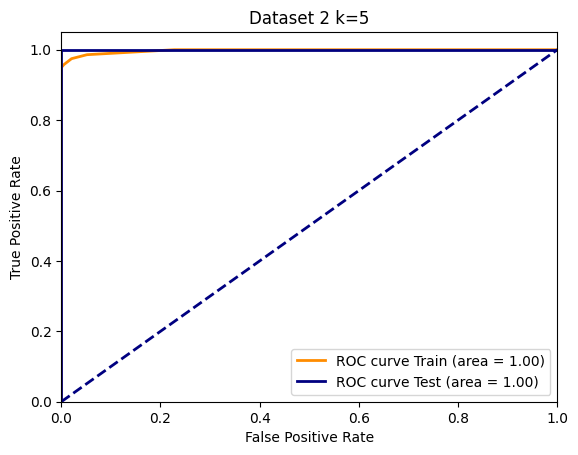

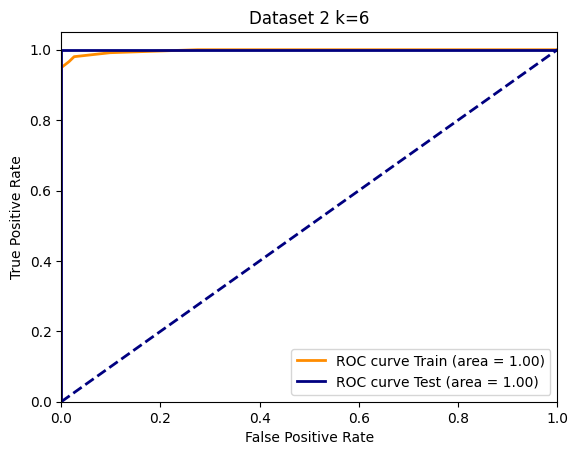

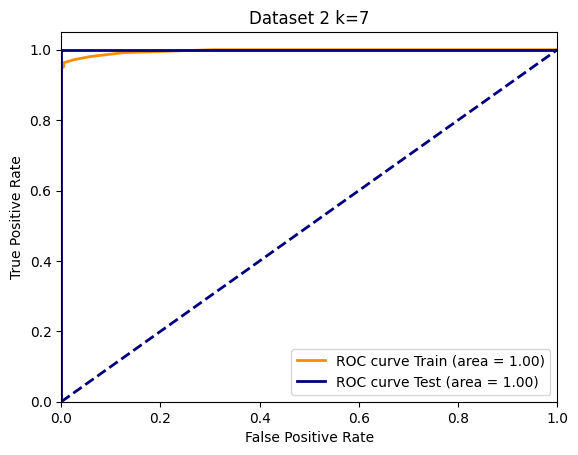

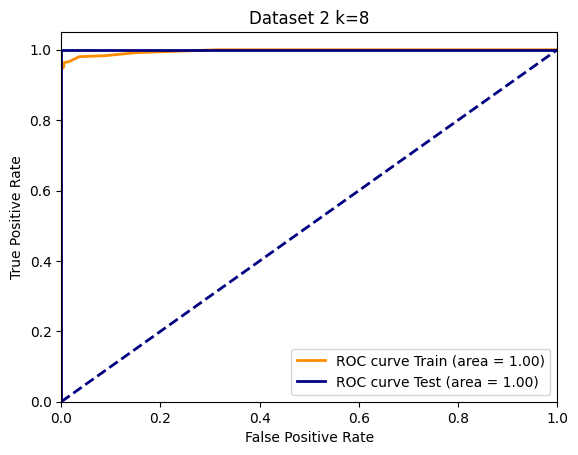

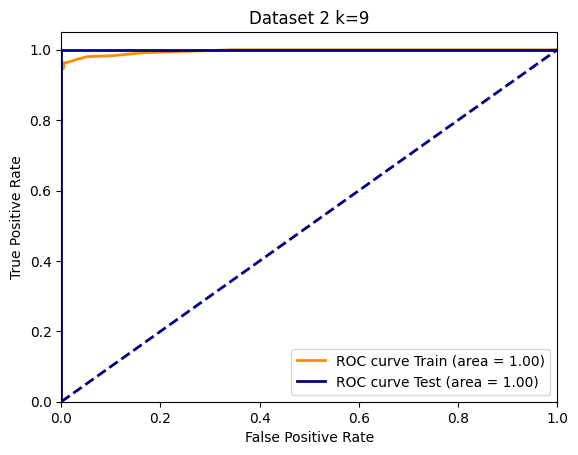

In [2213]:
# plot the results for each dataset
plot_results_exp2(results_1, 'Dataset 1')
plot_results_exp2(results_2, 'Dataset 2')

# plot the roc curve for the best k value, the worst k value, and the middle k value
def plot_k_roc(results, k_values, title):
  for k in k_values:
    row = results[results['k'] == k]
    fpr = row['fpr_e'].values[0]
    tpr = row['tpr_e'].values[0]
    roc_auc = row['AUC_e'].values[0]
    fpr_t = row['fpr_t'].values[0]
    tpr_t = row['tpr_t'].values[0]
    roc_auc_t = row['AUC_t'].values[0]
    plot_t_e_roc_curve(fpr_t, tpr_t, roc_auc_t, fpr, tpr, roc_auc, title + f' k={k}')

def get_k_to_plot(results):
  min_auc = results['AUC_e'].min()
  max_auc = results['AUC_e'].max()
  middle_auc = results['AUC_e'].median()
  # get the k values for the min, max, and median AUC
  k_values = results[(results['AUC_e'] == min_auc) | (results['AUC_e'] == max_auc) | (results['AUC_e'] == middle_auc)]['k']
  return k_values

plot_k_roc(results_1, get_k_to_plot(results_1), 'Dataset 1')
plot_k_roc(results_2, get_k_to_plot(results_2), 'Dataset 2')


## Experiment 3: Decision Tree with different depth values

In [2214]:
def experiment3(D, test_split=0.2, max_depth_start=1, max_depth_stop=10, max_depth_step=1, min_leaf_instance=1):
  X_t, Y_t, X_e, Y_e = train_test_split(D, test_split)

  # get all even multiples of step, that are within the range of k_start and k_stop
  max_depth_values = [d for d in range(max_depth_start, max_depth_stop + 1) if d % max_depth_step == 0]
  # insetrt start and stop if they are not in the list
  if max_depth_start not in max_depth_values:
    max_depth_values.insert(0, max_depth_start)
  if max_depth_stop not in max_depth_values:
    max_depth_values.append(max_depth_stop)

  results = []

  for max_depth in max_depth_values:
    dt = DT(max_depth=max_depth, min_leaf_instance=min_leaf_instance)
    dt.fit(X_t, Y_t)
    test_label_probs = get_dt_probs(dt, X_e, max_depth, min_leaf_instance)
    train_label_probs = get_dt_probs(dt, X_t, max_depth, min_leaf_instance)
    fpr_t, tpr_t, roc_auc_t, accuracy_t = roc_curve(Y_t, train_label_probs)
    fpr_e, tpr_e, roc_auc_e, accuracy_e = roc_curve(Y_e, test_label_probs)

    print(f'max_depth={max_depth}, AUC_t={roc_auc_t}, AUC_e={roc_auc_e}, Accuracy_t={accuracy_t}, Accuracy_e={accuracy_e}')
    results.append({
      'max_depth': max_depth,
      'AUC_t': roc_auc_t,
      'AUC_e': roc_auc_e,
      'Accuracy_t': accuracy_t,
      'Accuracy_e': accuracy_e,
      'fpr_t': fpr_t,
      'tpr_t': tpr_t,
      'fpr_e': fpr_e,
      'tpr_e': tpr_e
    })

  results = pd.DataFrame(results)

  return results

# Run the experiment on the two datasets
results_1 = experiment3(dataset_1, max_depth_stop=20, max_depth_step=2)
results_2 = experiment3(dataset_2)


max_depth=1, AUC_t=0.6206829718304979, AUC_e=0.6629746835443038, Accuracy_t=0.8332419089413056, Accuracy_e=0.8681318681318682
max_depth=2, AUC_t=0.629904975572572, AUC_e=0.6634599156118143, Accuracy_t=0.8354360943499726, Accuracy_e=0.865934065934066
max_depth=4, AUC_t=0.648260195419424, AUC_e=0.6716244725738396, Accuracy_t=0.8524410312671421, Accuracy_e=0.8571428571428571
max_depth=6, AUC_t=0.662233420532899, AUC_e=0.6497468354430379, Accuracy_t=0.8612177729018102, Accuracy_e=0.8593406593406593
max_depth=8, AUC_t=0.6706065278403381, AUC_e=0.6325105485232068, Accuracy_t=0.8661546900713111, Accuracy_e=0.8571428571428571
max_depth=10, AUC_t=0.6808777415889956, AUC_e=0.6083122362869199, Accuracy_t=0.8694459681843115, Accuracy_e=0.8593406593406593
max_depth=12, AUC_t=0.6851157271057828, AUC_e=0.6076371308016878, Accuracy_t=0.8716401535929786, Accuracy_e=0.8593406593406593
max_depth=14, AUC_t=0.6879092893524132, AUC_e=0.594535864978903, Accuracy_t=0.8727372462973121, Accuracy_e=0.85934065934

In [2215]:
def plot_result_exp3(results, title):
  plt.plot(results['max_depth'], results['AUC_e'], label='Test AUC')
  plt.xlabel('max_depth')
  plt.ylabel('AUC')
  plt.title(title)
  plt.show()

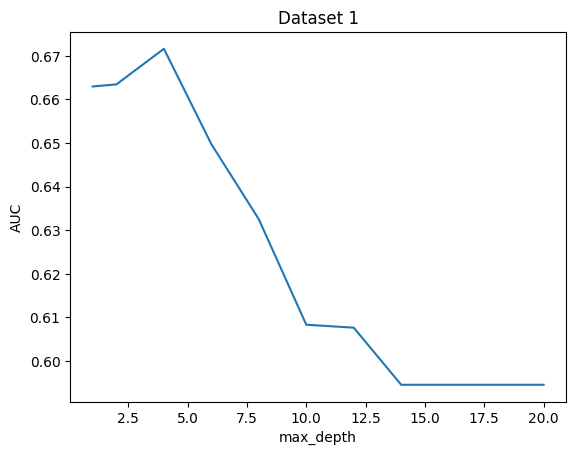

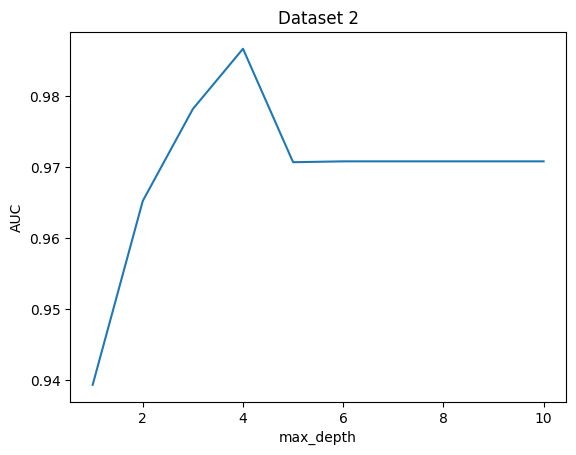

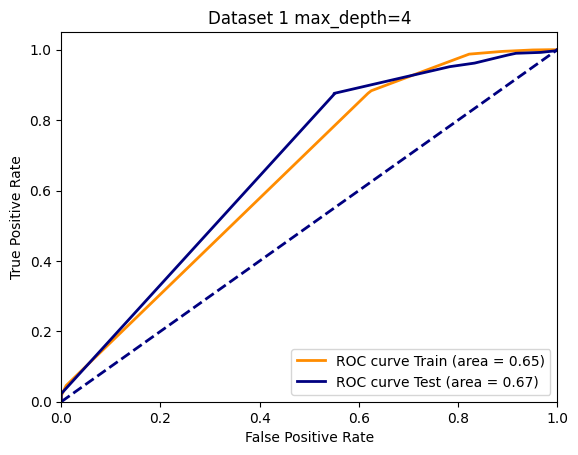

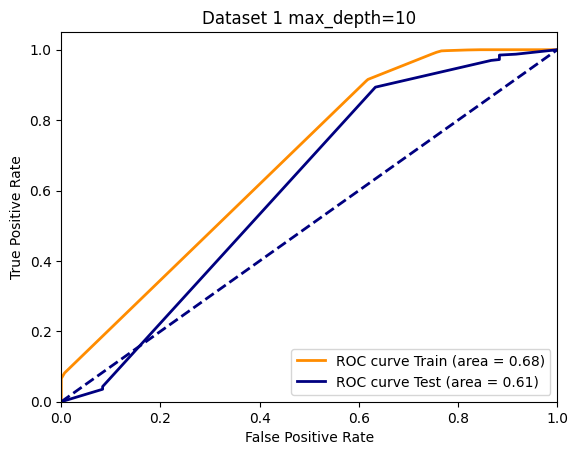

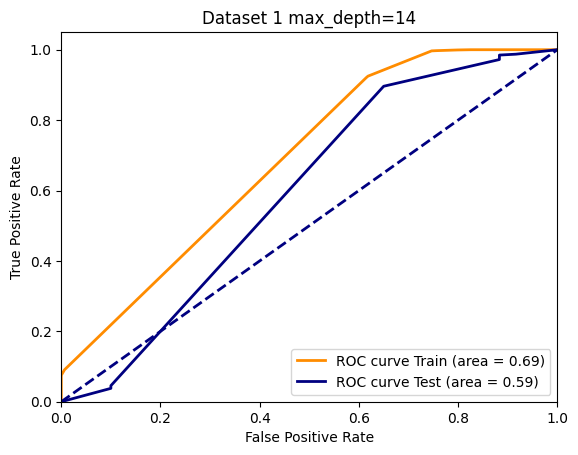

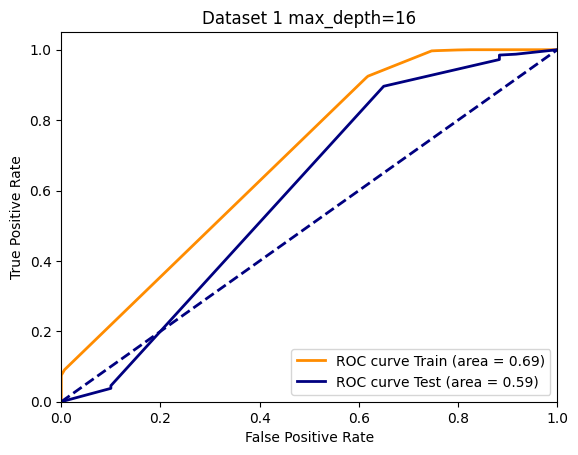

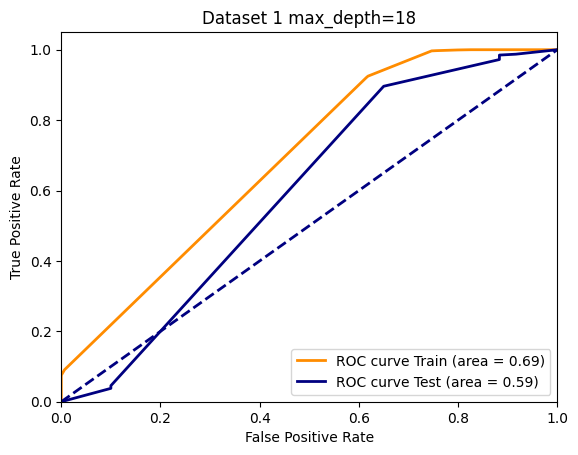

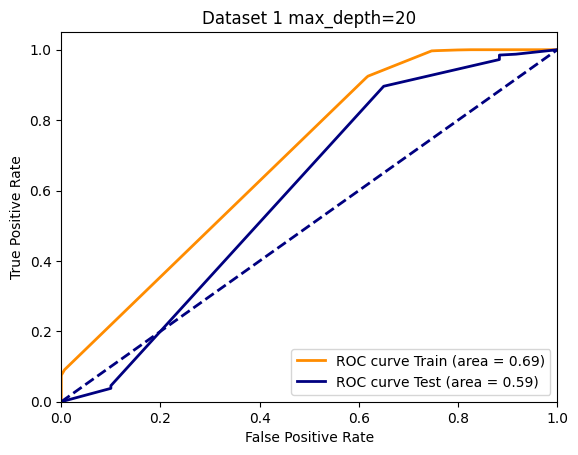

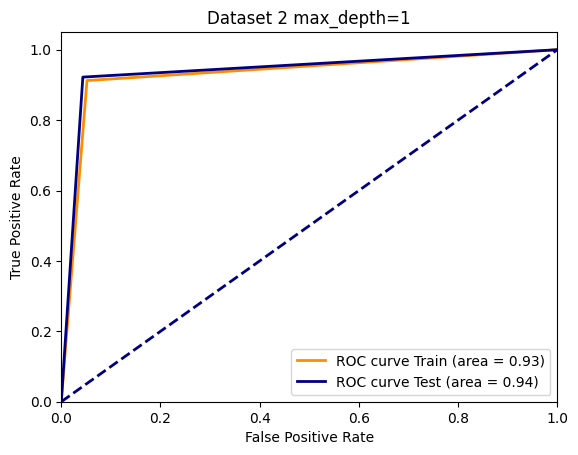

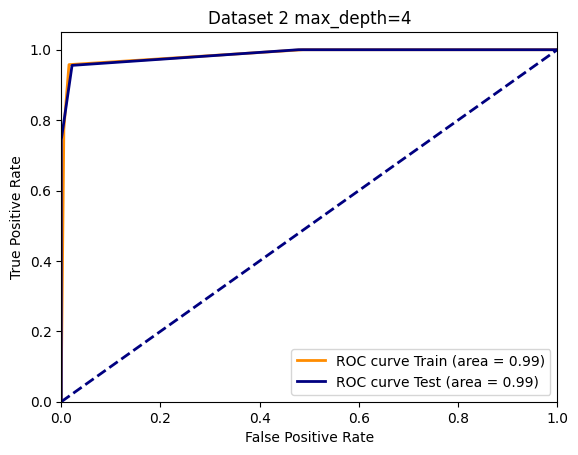

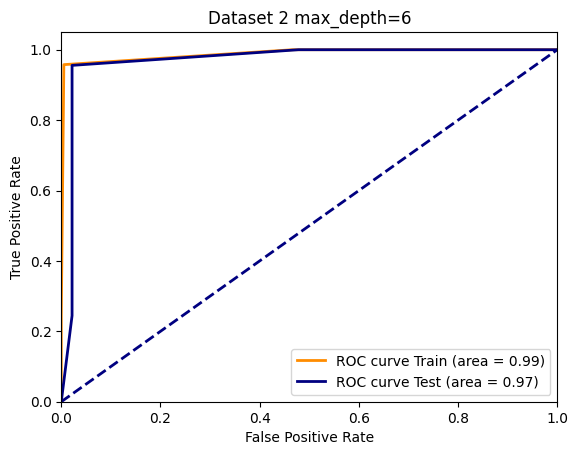

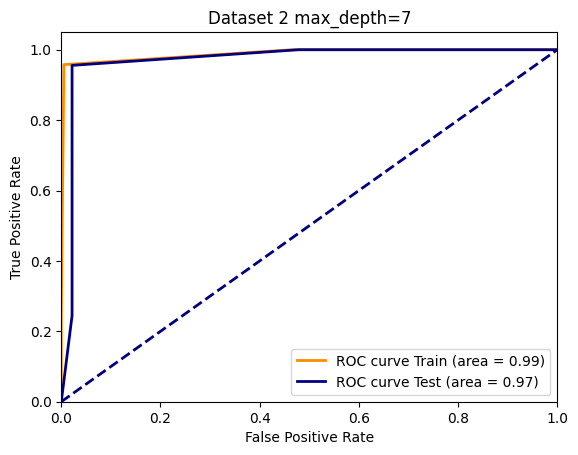

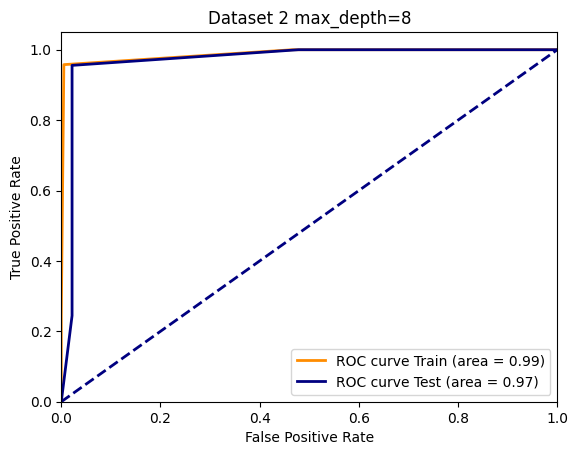

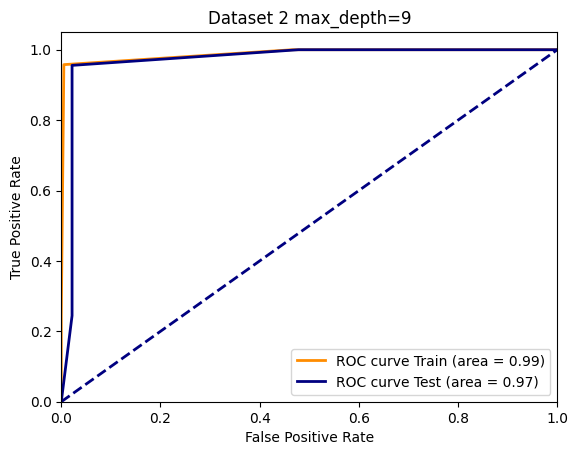

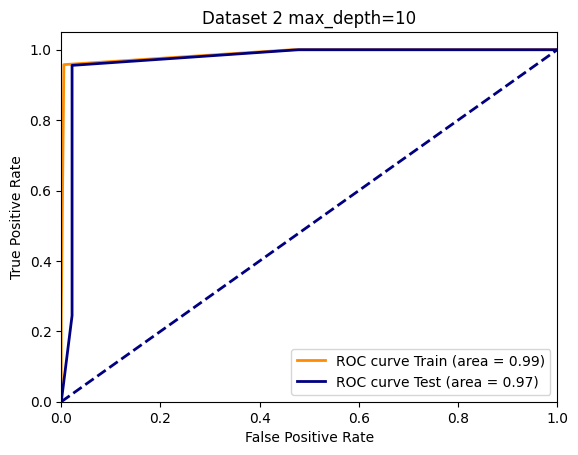

In [2216]:

# plot the results for each dataset
plot_result_exp3(results_1, 'Dataset 1')
plot_result_exp3(results_2, 'Dataset 2')

# plot the roc curve for the best max_depth value, the worst max_depth value, and the middle max_depth value
def plot_max_depth_roc(results, max_depth_values, title):
  for max_depth in max_depth_values:
    row = results[results['max_depth'] == max_depth]
    fpr = row['fpr_e'].values[0]
    tpr = row['tpr_e'].values[0]
    roc_auc = row['AUC_e'].values[0]
    fpr_t = row['fpr_t'].values[0]
    tpr_t = row['tpr_t'].values[0]
    roc_auc_t = row['AUC_t'].values[0]
    plot_t_e_roc_curve(fpr_t, tpr_t, roc_auc_t, fpr, tpr, roc_auc, title + f' max_depth={max_depth}')

def get_max_depth_to_plot(results):
  min_auc = results['AUC_e'].min()
  max_auc = results['AUC_e'].max()
  middle_auc = results['AUC_e'].median()
  # get the k values for the min, max, and median AUC
  max_depth_values = results[(results['AUC_e'] == min_auc) | (results['AUC_e'] == max_auc) | (results['AUC_e'] == middle_auc)]['max_depth']
  return max_depth_values

plot_max_depth_roc(results_1, get_max_depth_to_plot(results_1), 'Dataset 1')
plot_max_depth_roc(results_2, get_max_depth_to_plot(results_2), 'Dataset 2')

## Experiment 4: Cost and Distance functions

### Distance Functions for KNN

In [2217]:
def experiment4_a(D, k=3, test_split=0.2):
  X_t, Y_t, X_e, Y_e = train_test_split(D, test_split)

  distance_functions = [euclidean, manhattan, chebyshev, hamming, cosineSim]

  results = []

  for distance_fn in distance_functions:
    knn = KNN(k=k, similarity_fn=distance_fn)
    knn.fit(X_t, Y_t, k)
    test_label_probs = knn.predict(X_e)
    train_label_probs = knn.predict(X_t)
    fpr_t, tpr_t, roc_auc_t, accuracy_t = roc_curve(Y_t, train_label_probs)
    fpr_e, tpr_e, roc_auc_e, accuracy_e = roc_curve(Y_e, test_label_probs)

    print(f'distance_fn={distance_fn.__name__}, AUC_t={roc_auc_t}, AUC_e={roc_auc_e}, Accuracy_t={accuracy_t}, Accuracy_e={accuracy_e}')
    results.append({
      'distance_fn': distance_fn.__name__,
      'AUC_t': roc_auc_t,
      'AUC_e': roc_auc_e,
      'Accuracy_t': accuracy_t,
      'Accuracy_e': accuracy_e,
      'fpr_t': fpr_t,
      'tpr_t': tpr_t,
      'fpr_e': fpr_e,
      'tpr_e': tpr_e
    })

  results = pd.DataFrame(results)
  return results


# Run the experiment on the two datasets
results_1 = experiment4_a(dataset_1, k=70)
results_2 = experiment4_a(dataset_2, k=3)


distance_fn=euclidean, AUC_t=0.7563028394719518, AUC_e=0.7782489451476793, Accuracy_t=0.8370817334064728, Accuracy_e=0.865934065934066
distance_fn=manhattan, AUC_t=0.7594071584491182, AUC_e=0.7635443037974683, Accuracy_t=0.8365331870543061, Accuracy_e=0.865934065934066
distance_fn=chebyshev, AUC_t=0.7542423166210457, AUC_e=0.7682278481012658, Accuracy_t=0.8348875479978058, Accuracy_e=0.8615384615384616
distance_fn=hamming, AUC_t=0.6593402428883268, AUC_e=0.5539662447257383, Accuracy_t=0.8332419089413056, Accuracy_e=0.8681318681318682
distance_fn=cosineSim, AUC_t=0.33114973493641936, AUC_e=0.29430379746835444, Accuracy_t=0.8326933625891387, Accuracy_e=0.8681318681318682
distance_fn=euclidean, AUC_t=0.9978850150756711, AUC_e=0.9997584541062802, Accuracy_t=0.9762340036563071, Accuracy_e=0.9852941176470589
distance_fn=manhattan, AUC_t=0.9985509791867919, AUC_e=0.9782608695652174, Accuracy_t=0.9780621572212066, Accuracy_e=0.9779411764705882
distance_fn=chebyshev, AUC_t=0.9967579988876204, A

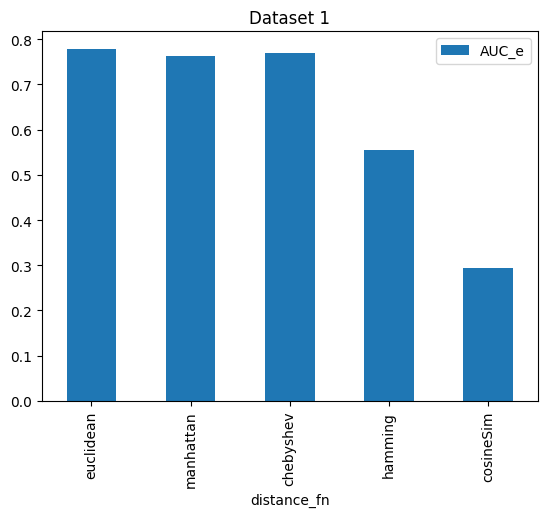

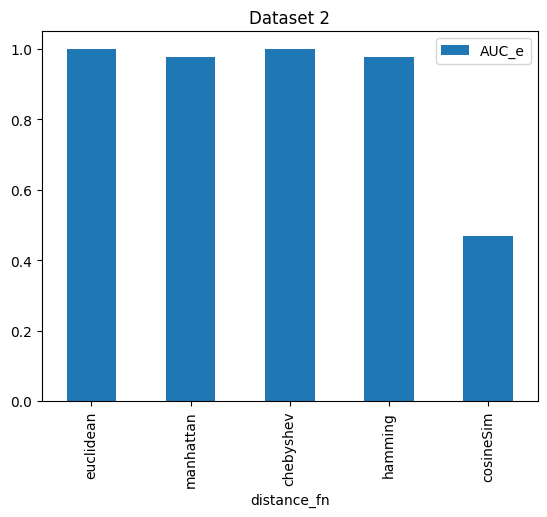

In [2218]:
def plot_result_exp4_a(results, title):
  # do a bar plot for each distance function
  results.plot(x='distance_fn', y='AUC_e', kind='bar', title=title)
  plt.show()
  

plot_result_exp4_a(results_1, 'Dataset 1')
plot_result_exp4_a(results_2, 'Dataset 2')

### Cost Functions for Decision Tree

In [2219]:
def experiment4_b(D, max_depth=3, min_leaf_instance=1, test_split=0.2):
  X_t, Y_t, X_e, Y_e = train_test_split(D, test_split)

  cost_functions = [misclassification_error, entropy, gini_index]

  results = []
  for cost_fn in cost_functions:
    dt = DT(max_depth=max_depth, min_leaf_instance=min_leaf_instance, cost_fn=cost_fn)
    dt.fit(X_t, Y_t)
    test_label_probs = get_dt_probs(dt, X_e, max_depth, min_leaf_instance)
    train_label_probs = get_dt_probs(dt, X_t, max_depth, min_leaf_instance)
    fpr_t, tpr_t, roc_auc_t, accuracy_t = roc_curve(Y_t, train_label_probs)
    fpr_e, tpr_e, roc_auc_e, accuracy_e = roc_curve(Y_e, test_label_probs)

    print(f'cost_fn={cost_fn.__name__}, AUC_t={roc_auc_t}, AUC_e={roc_auc_e}, Accuracy_t={accuracy_t}, Accuracy_e={accuracy_e}')
    results.append({
      'cost_fn': cost_fn.__name__,
      'AUC_t': roc_auc_t,
      'AUC_e': roc_auc_e,
      'Accuracy_t': accuracy_t,
      'Accuracy_e': accuracy_e,
      'fpr_t': fpr_t,
      'tpr_t': tpr_t,
      'fpr_e': fpr_e,
      'tpr_e': tpr_e
    })

  results = pd.DataFrame(results)
  return results

# Run the experiment on the two datasets
results_1 = experiment4_b(dataset_1, max_depth=4)
results_2 = experiment4_b(dataset_2, max_depth=4)

cost_fn=misclassification_error, AUC_t=0.648260195419424, AUC_e=0.6716244725738396, Accuracy_t=0.8524410312671421, Accuracy_e=0.8571428571428571
cost_fn=entropy, AUC_t=0.7681873895568414, AUC_e=0.7654430379746835, Accuracy_t=0.8376302797586396, Accuracy_e=0.8681318681318682
cost_fn=gini_index, AUC_t=0.7582420914036244, AUC_e=0.7277426160337552, Accuracy_t=0.8403730115194734, Accuracy_e=0.8461538461538461
cost_fn=misclassification_error, AUC_t=0.9855683381634028, AUC_e=0.9865942028985508, Accuracy_t=0.9670932358318098, Accuracy_e=0.9632352941176471
cost_fn=entropy, AUC_t=0.9964213576885923, AUC_e=0.9821256038647344, Accuracy_t=0.9689213893967094, Accuracy_e=0.9779411764705882
cost_fn=gini_index, AUC_t=0.9961066713503703, AUC_e=0.9817632850241547, Accuracy_t=0.9670932358318098, Accuracy_e=0.9558823529411765


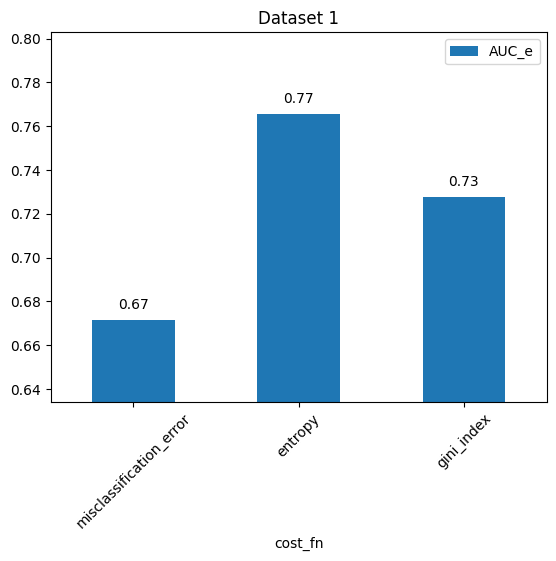

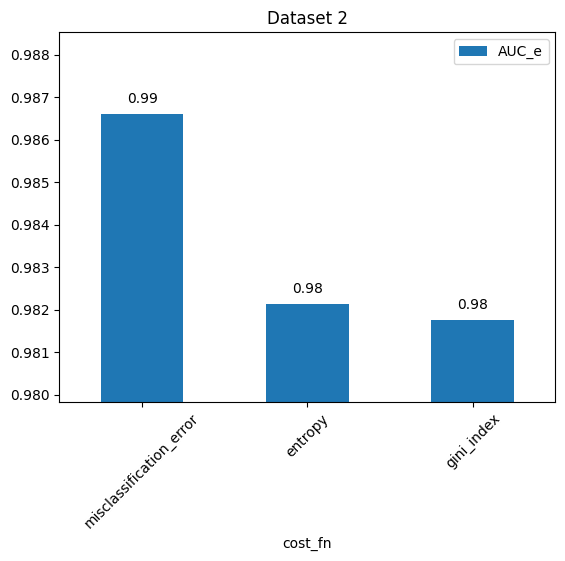

In [2220]:
# plot results

def plot_result_exp4_b(results, title):
  # scale the window to focus on the differences between the bars
  # do it based on the max and min values with some padding
  # do a bar plot for each distance function
  results.plot(x='cost_fn', y='AUC_e', kind='bar', title=title)
  # make bar names diagonal
  plt.xticks(rotation=45)
    # focus the window on the differences between the bars
  min_y_lim = results['AUC_e'].min()
  max_y_lim = results['AUC_e'].max()
  diff = max_y_lim - min_y_lim
  buffer = diff * 0.4
  plt.ylim(max(0, min_y_lim - buffer), min(1, max_y_lim + buffer))
  # display the value for each bar
  for i, v in enumerate(results['AUC_e']):
    # place relative to ylims
    plt.text(i, v + buffer * 0.1, f'{v:.2f}', ha='center', va='bottom')
  

  

  plt.show()

plot_result_exp4_b(results_1, 'Dataset 1')
plot_result_exp4_b(results_2, 'Dataset 2')

## Experiment 5: Key Feature Selection for KNN
- 

## Experiment 6: Feature Selection

- Feature importance is a measure of how relevant a feature is in predicting the target variable. This can also be thought as corelation between the feature and the target variable. - We will use the feature importance to select the most important features and evaluate the models with the selected features.
- One way to measure feature important is to see how much a feature is used to reduce the cost of a split in a decision tree.
- We can measure this by considering how much a single nodes split is able to reduce its current cost. 
- To calculate this for a node j, we can use the following formula:
    - $cost_{j} = \frac{N_{j}}{N_{j}} * cost_{j} - \frac{N_{j_R}}{N_{j}} * cost_{j_R} - \frac{N_{j_L}}{N_{j}} * cost_{j_L}$
    - where $N_{j}$ is the number of samples in node j, $N_{j_R}$ is the number of samples in the right child of node j, $N_{j_L}$ is the number of samples in the left child of node j, $cost_{j}$ is the cost of node j, $cost_{j_R}$ is the cost of the right child of node j, and $cost_{j_L}$ is the cost of the left child of node j.
- To calculate the feature importance of feature d, we sum up the reduction in cost for all nodes that use feature d to split.
    - $importance_{d} = \sum_{j \in nodes} I(feature_{j} = d) * cost_{j}$
